In [ ]:
print("Rodolfo")

Rodolfo


In [ ]:
import pandas as pd

In [ ]:
# aqui, criamos uma variável chamada filmes e lemos o arquivo csv chamado MOVIES.CSV. O arquivo está no Google Drive.
filmes = pd.read_csv("/content/drive/MyDrive/Quarentena Dados 01/movies.csv")

In [ ]:
filmes.columns = ['filmeId', "titulo", "generos"]

In [ ]:
avaliacoes = pd.read_csv("/content/drive/MyDrive/Quarentena Dados 01/ratings.csv")

In [ ]:
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
avaliacoes.shape

(100836, 4)

In [ ]:
len(avaliacoes)

100836

In [ ]:
avaliacoes.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [ ]:
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [ ]:
avaliacoes.query("filmeId==1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [ ]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [ ]:
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [ ]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [ ]:
filmes_com_media = filmes.join(notas_medias_por_filme, on='filmeId')
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


**DESAFIO PAULO:**
Encontrar os filmes que não tiveram avaliação.


In [ ]:
filmes_com_media.columns = ["filmeId", "titulo", "generos", "media"]

In [ ]:
filmes_com_media.sort_values("media").tail(18)

,filmeId,titulo,generos,media
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


**DESAFIO 02:**
Mudar o nome da coluna nota para Média

**DESAFIO 03:** Colocar o número de avaliações por filme. (TOTAL)

In [ ]:
filmes_com_media.groupby("titulo").media.nunique().sort_values(ascending=False).head(20)

titulo
Confessions of a Dangerous Mind (2002)                                                                        2
Eros (2004)                                                                                                   2
Emma (1996)                                                                                                   2
War of the Worlds (2005)                                                                                      2
Saturn 3 (1980)                                                                                               2
À nous la liberté (Freedom for Us) (1931)                                                                     1
Fried Green Tomatoes (1991)                                                                                   1
Friends with Kids (2011)                                                                                      1
Friends with Benefits (2011)                                                                     

**DESAFIO 04:** Arredondar as médias (coluna de nota média) para duas casas decimais.



In [ ]:
filmes_com_media.round(2)

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50
9739,193585,Flint (2017),Drama,3.50
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50


**DESAFIO 05:** Descobrir os gêneros dos filmes (quais são eles, únicos). (MAIS PUXADO!)

In [ ]:
filmes_com_media["generos"].str.get_dummies('|').sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

**DESAFIO 06:** Contar o número de aparições por gênero.

In [ ]:
generos = filmes_com_media["generos"].str.get_dummies('|').sum().sort_values(ascending=False)

**Desafio 07:** Plotar o gráfico de aparições de cada gênero. Pode ser um gráfico de tipo igual a barra.

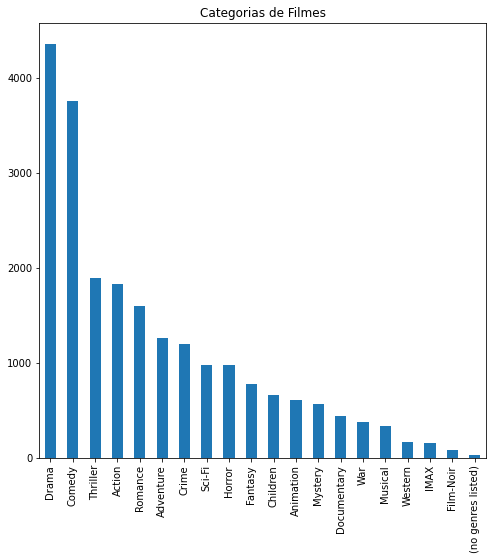

In [ ]:
import matplotlib.pyplot as plt
generos.plot(kind='bar', title='Categorias de Filmes', figsize=(8,8))
plt.show()

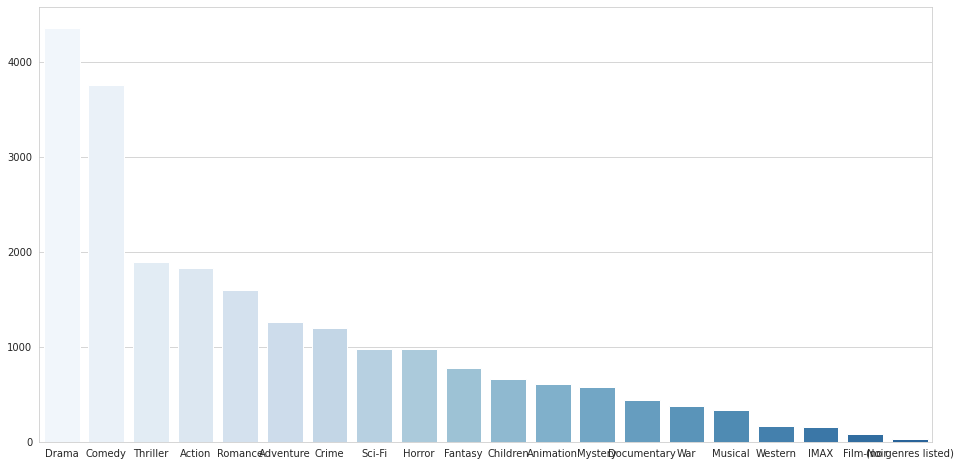

In [ ]:
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(16,8))
sns.barplot(x=generos.index,
            y=generos.values,
            palette=sns.color_palette("Blues", n_colors=len(generos) + 4))
plt.show()

DESAFIO 01 AULA 02: Rotacionar os THICKS (os nomes dos gêneros)

DESAFIO 02 AULA 02: Comparar dois filmes e visualizar gráficos bem diferentes.

DESAFIO 03 AULA 02: 10 filmes com mais nota e fazer o boxplot.

DESAFIO 04 AULA 02: O boxplot estar num tamanho adequado e com os nomes dos filmes nos ticks (usar o seaborn)

DESAFIO 05 AULA 02: Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

DESAFIO 06 AULA 02: Escolher um filme e plotar o boxplot e o histograma. Um do lado do outro (no mesmo gráfico ou gráficos distintos).

DESAFIO 07 AULA 02: Gráfico de notas médias por ano.